In [1]:
import numpy as np

# delete when making package
import sys
sys.path.insert(1, '/projectnb/me700/students/quan/assignments/fiber_network_active_contraction/src/fiber_network')
import mesh_generation as mg

cur_seed=0
np.random.seed(cur_seed)

# [50,100,200,300,500,700,1000,1200,1400,1600,1800,2000,2200,2400,]
# parameters -----------------------------------------------------------------------------
char_len = 0.006 # characteristics length of mesh | mesh refined at 0.008 (set default to 0.006)
fib_n = 100 #number of fibers
min_fib_len = 0.1 # for uniform distribution - min length of fibers
max_fib_len = 0.5 # for uniform distribution - max length of fibers
mean_fib_len = 0.3 # for normal distribution - mean length of fibers
sd_fib_len = 0.05 # for normal distribution - standard deviation of fibers
ang_range = [10,45] # for uniform distribution - range of angles in degrees
ang_mu = 0 # for von mises distribution - 'mean' angle/center location of angle
ang_kappa = 0 # for von mises distribution - measure of concentration around 'mean'
mean_radii = 0.0001 # for normal distribution - mean radii of fibers
sd_radii = 0.000025 # for normal distribution - standard deviation of fibers
len_dist_type = 'normal' # type of distribution for fiber length: 'constant','uniform', 'normal'
ang_dist_type = 'random_orientation' # type of distribution for angle: 'random_orientation','uniform','von_mises'
radii_dist_type = None # type of distribution for radii of fibers: None, 'normal'
num_patch_x = 4 # number of patches in the x direction for generating fibers
num_patch_y = 2 # number of patches in the y direction for generating fibers
dim = 2 # dimension of fibers - currently only works for 2D
slit_option = False # is the wound a small slit?
slit_shape = np.array([[0.35, 0.34480122],[0.65, 0.34480122]]) # the line depicting the slit
slit_size = np.around(np.abs(slit_shape[1,0] - slit_shape[0,0]),3)
slit_dir = 'y' # direction of the slit: 'x' or 'y'
slit_dist_from_mid = 0.001 # the distance from the center of the line to the edge for slit
varying_radii = False

# folders
mesh_folder = 'example_data/mesh_xdmf/'
input_radii_folder = 'example_data/fib_net_radii/'
wound_data_folder = 'example_data/wound_data/'
tissue_props_folder = 'example_data/tissue_properties/'
basename = 'test' # 'fibers_microtissue_wound'

# no touchy below!! ----------------------------------------------------------------------

fiber_length_params = mg.FiberLengthParams(
    min_fib_len=min_fib_len,max_fib_len=max_fib_len,mean_fib_len=mean_fib_len,sd_fib_len=sd_fib_len,len_dist_type=len_dist_type,
)

fiber_orientation_params = mg.FiberOrientationParams(
    ang_range=ang_range,ang_mu=ang_mu,ang_kappa=ang_kappa,ang_dist_type=ang_dist_type,
)

fiber_radii_params = mg.FiberRadiiParams(
    mean_radii=mean_radii,sd_radii=sd_radii,radii_dist_type=radii_dist_type,
)

f_name = mg.get_filename(
    basename=basename,
    fib_n=fib_n,
    length_params=fiber_length_params,
    orientation_params=fiber_orientation_params,
    radii_params=fiber_radii_params,
    slit_option=slit_option,
    slit_size=slit_size,
    seed_num=cur_seed,
)


# synthetic data describing a microtisue -------------------------------------------------
tissue_pts,posts_pos,posts_radius,wound_shape=mg.obtain_sample_tissue_params()
if slit_option == True:
        wound_shape = mg.create_slit_wound(slit=slit_shape,slit_dir=slit_dir,slit_dist_from_mid=slit_dist_from_mid)

# create a fiber network representing the microtissue ------------------------------------
fib_net,fib_ind,radii = mg.generate_fib_net_for_tissue(tissue_pts,fib_n=fib_n,min_fib_L=min_fib_len,\
                                        max_fib_L=max_fib_len,mean_fib_L=mean_fib_len,\
                                        sd_fib_L=sd_fib_len,ang_range=ang_range,\
                                        ang_mu=ang_mu,ang_kappa=ang_kappa,mean_radii=mean_radii,\
                                        sd_radii=sd_radii,posts_pos=posts_pos,posts_radius=posts_radius,\
                                        wound_shape=wound_shape,len_dist_type=len_dist_type,\
                                        ang_dist_type=ang_dist_type,radii_dist_type=radii_dist_type,\
                                        num_patch_x=num_patch_x,num_patch_y=num_patch_y,\
                                        dim=dim,posts_tol=1e-14)

# # save mesh
# mg.generate_fib_net_xdmf_meshio(fib_net=fib_net,f_name=f_name,output_xdmf=mesh_folder,\
#                              fib_ind=fib_ind,characteristic_length=char_len)
# if radii_dist_type is not None:
#         mg.save_radii(filename=f_name,output_folder=input_radii_folder,radii=radii,fib_ind=fib_ind)

# print(f'mean initial fiber length for normal distribution={mean_fib_len}')
# density_at_stiffness_percolation = 5.71/mean_fib_len
# print(f'density at stiffness percolation={density_at_stiffness_percolation}')
# avg_len = wa.get_avg_lines_len(fib_net)
# print(f'average segment length={avg_len}')
# avg_conn = wa.get_avg_conn(fib_net)
# print(f'average connectivities={avg_conn}')
# density_2D = np.pi / (2*avg_len)
# print(f'2D density={density_2D}')

/scratch/ipykernel_2829916/2392543403.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = plt.cm.get_cmap('tab20c',num_unique_ind)


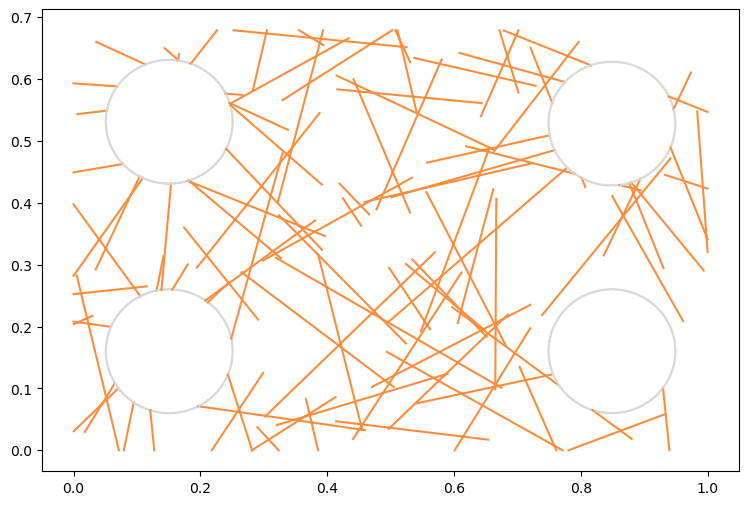

In [2]:
import matplotlib.pyplot as plt

num_unique_ind = len(np.unique(fib_ind))
colormap = plt.cm.get_cmap('tab20c',num_unique_ind)

fig,ax = plt.subplots(figsize=(9,6))
for i in range(len(fib_net)): # len(fib_net)
    p1 = fib_net[i,:2]
    p2 = fib_net[i,2:]

    color = colormap(fib_ind[i]/(num_unique_ind-1))
    ax.plot([p1[0],p2[0]],[p1[1],p2[1]],color=color) # 